Understanding the pytorch

In [ ]:
import torch

x = torch.tensor([5,7])

y = torch.tensor([7,5])

print(x*y)

tensor([35, 35])


In [201]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [202]:
x.shape

torch.Size([2, 5])

In [203]:
y =  torch.rand([2,5])
y

tensor([[0.0757, 0.6286, 0.2808, 0.0340, 0.9027],
        [0.1317, 0.2089, 0.1936, 0.7964, 0.2457]])

In [204]:
y.view([1,10])

tensor([[0.0757, 0.6286, 0.2808, 0.0340, 0.9027, 0.1317, 0.2089, 0.1936, 0.7964,
         0.2457]])

Importing the data 

In [205]:
import torch
import torchvision
from torchvision import transforms, datasets

In [206]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [207]:
trainsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)

In [208]:
for data in trainsets:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [209]:
x, y = data[0][0], data[1][0]
print(y)

tensor(0)


In [210]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


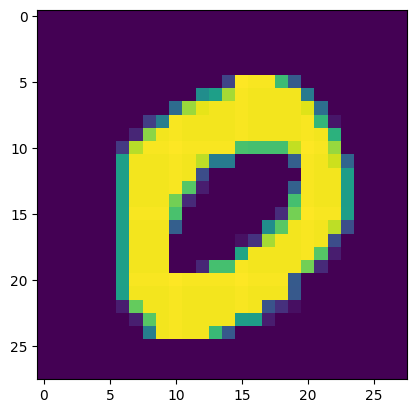

In [211]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))

In [212]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainsets:
    Xs , ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [213]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Building the neural network

In [214]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)


In [215]:
import torch.nn as nn
import torch.nn.functional as F


In [216]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear( 28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [217]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

In [218]:
ouput = net(X)
print(ouput)

tensor([[-2.2361, -2.2198, -2.2837, -2.3599, -2.3610, -2.3057, -2.3156, -2.1837,
         -2.3619, -2.4240]], grad_fn=<LogSoftmaxBackward0>)


Training Model


In [219]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainsets:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.0964, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)


In [220]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainsets:   
        X, y = data
        output = net(X.view(-1, 28*28))    
        for idx, i in enumerate(output):   
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1


print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.978


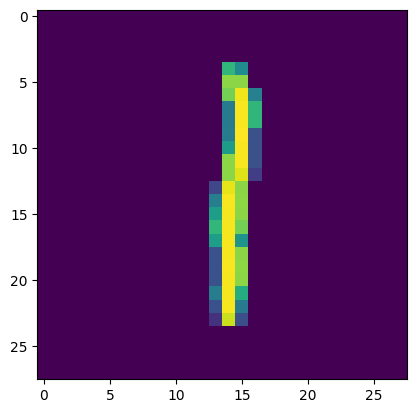

In [221]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [222]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(1)


Convolutional Neural Networks

In [223]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False  # Set to true to run once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img, dtype=np.float32), np.eye(2)[self.LABELS[label]]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        images = np.array([i[0] for i in self.training_data])
        labels = np.array([i[1] for i in self.training_data])
        np.save("training_data_images.npy", images)
        np.save("training_data_labels.npy", labels)
        print('Cats:', self.catcount)
        print('Dogs:', self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()


PetImages/Cat


100%|██████████| 12501/12501 [01:15<00:00, 164.89it/s]


PetImages/Dog


100%|██████████| 12501/12501 [01:20<00:00, 154.74it/s]


Cats: 12476
Dogs: 12470


In [224]:
training_data = np.load("training_data_images.npy", allow_pickle=True)
print(len(training_data))


24946


In [225]:
print(training_data[1])

[[151. 156. 156. ... 130. 125. 125.]
 [158. 162. 164. ... 139. 139. 139.]
 [161. 163. 168. ... 155. 145. 137.]
 ...
 [159. 148. 131. ... 126. 115.  98.]
 [153. 151. 130. ... 120. 123.  66.]
 [150. 144. 114. ... 121.  94.  92.]]


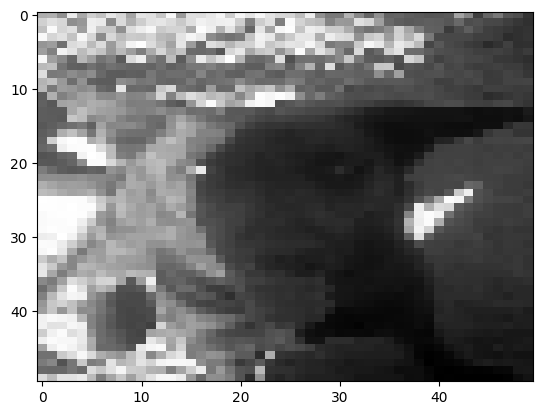

In [226]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0], cmap="gray", aspect='auto')
plt.show()

In [227]:
training_data[1][1]

array([158., 162., 164., 162., 153., 128., 122., 130., 141., 138., 133.,
       138., 105., 107.,  91.,  70.,  55.,  47.,  43.,  58.,  51.,  47.,
        36.,  29.,  55.,  73.,  79.,  74.,  79.,  83.,  87.,  97., 106.,
        92., 107., 100.,  98., 107., 108., 128., 133., 138., 134., 152.,
       142., 148., 142., 139., 139., 139.], dtype=float32)

Training Convnet


In [125]:
import os
import cv2
import numpy as np
from tqdm import tqdm


REBUILD_DATA = False # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()


training_data = np.load("training_data_images.npy", allow_pickle=True)
print(len(training_data))

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [126]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(1, 1, 50, 50)  # Use batch_size=1 for shape calculation
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)  # 2 classes

    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].numel()  # Compute the flattened size
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # Raw logits
        return x

net = Net()
print(net)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [133]:
import numpy as np
import torch

# Example conversion if targets are in numpy.float32 format
# Ensure targets are integers for classification tasks

# Example dummy data
inputs = np.random.rand(1000, 50, 50)  # Replace with your actual input data
targets = np.random.randint(0, 2, size=(1000,))  # Dummy targets (2 classes: 0 and 1)

# Convert numpy arrays to PyTorch tensors
X = torch.tensor(inputs, dtype=torch.float32)  # Ensure data type is float32
y = torch.tensor(targets, dtype=torch.long)    # Ensure targets are in long format for classification

# Normalize inputs if needed
X = X / 255.0

# Calculate validation size
VAL_PCT = 0.1
val_size = int(len(X) * VAL_PCT)
print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(f"Training data size: {len(train_X)}")
print(f"Testing data size: {len(test_X)}")


100
Training data size: 900
Testing data size: 100


In [136]:
from tqdm import tqdm
import torch.optim as optim
import torch.nn as nn

# Initialize optimizer and loss function
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()  # For classification tasks

# Training parameters
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE]
        batch_y = train_y[i:i+BATCH_SIZE]

        # Ensure correct shape
        batch_size = batch_X.size(0)
        if batch_X.dim() == 3:  # Check if input is missing the channel dimension
            batch_X = batch_X.unsqueeze(1)  # Add channel dimension: [batch_size, 1, 50, 50]

        print(f"Batch X shape: {batch_X.shape}")

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()  # Update weights

        # Print output and target shapes for verification
        print(f"Output shape: {outputs.shape}")
        print(f"Target shape: {batch_y.shape}")
        print(f"Loss: {loss.item()}")

    print(f"Epoch: {epoch}. Loss: {loss.item()}")


 11%|█         | 1/9 [00:00<00:01,  7.41it/s]

Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6924752593040466
Batch X shape: torch.Size([100, 1, 50, 50])


 33%|███▎      | 3/9 [00:00<00:00,  7.54it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6882010698318481
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6923975944519043
Batch X shape: torch.Size([100, 1, 50, 50])


 56%|█████▌    | 5/9 [00:00<00:00,  7.80it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6965685486793518
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6939997673034668
Batch X shape: torch.Size([100, 1, 50, 50])


 78%|███████▊  | 7/9 [00:00<00:00,  7.28it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6963790655136108
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.696948766708374
Batch X shape: torch.Size([100, 1, 50, 50])


100%|██████████| 9/9 [00:01<00:00,  7.51it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6858667731285095
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.7004825472831726
Epoch: 0. Loss: 0.7004825472831726


Understanding the pytorch

In [ ]:
import torch

x = torch.tensor([5,7])

y = torch.tensor([7,5])

print(x*y)

tensor([35, 35])


In [ ]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [ ]:
x.shape

torch.Size([2, 5])

In [ ]:
y =  torch.rand([2,5])
y

tensor([[0.0757, 0.6286, 0.2808, 0.0340, 0.9027],
        [0.1317, 0.2089, 0.1936, 0.7964, 0.2457]])

In [ ]:
y.view([1,10])

tensor([[0.0757, 0.6286, 0.2808, 0.0340, 0.9027, 0.1317, 0.2089, 0.1936, 0.7964,
         0.2457]])

Importing the data 

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

In [ ]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
trainsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)

In [ ]:
for data in trainsets:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y = data[0][0], data[1][0]
print(y)

tensor(0)


In [ ]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


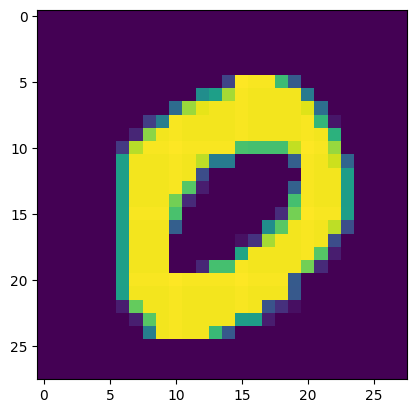

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))

In [ ]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainsets:
    Xs , ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Building the neural network

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear( 28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

In [ ]:
ouput = net(X)
print(ouput)

tensor([[-2.2361, -2.2198, -2.2837, -2.3599, -2.3610, -2.3057, -2.3156, -2.1837,
         -2.3619, -2.4240]], grad_fn=<LogSoftmaxBackward0>)


Training Model


In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainsets:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.0964, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainsets:   
        X, y = data
        output = net(X.view(-1, 28*28))    
        for idx, i in enumerate(output):   
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1


print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.978


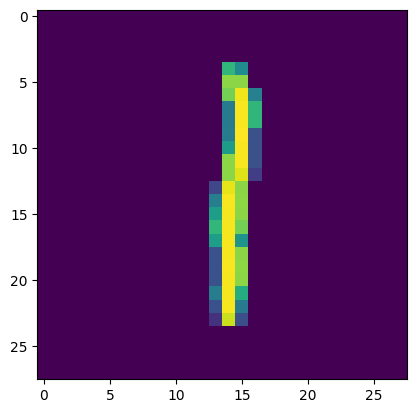

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(1)


Convolutional Neural Networks

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False  # Set to true to run once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img, dtype=np.float32), np.eye(2)[self.LABELS[label]]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        images = np.array([i[0] for i in self.training_data])
        labels = np.array([i[1] for i in self.training_data])
        np.save("training_data_images.npy", images)
        np.save("training_data_labels.npy", labels)
        print('Cats:', self.catcount)
        print('Dogs:', self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()


PetImages/Cat


100%|██████████| 12501/12501 [01:15<00:00, 164.89it/s]


PetImages/Dog


100%|██████████| 12501/12501 [01:20<00:00, 154.74it/s]


Cats: 12476
Dogs: 12470


In [ ]:
training_data = np.load("training_data_images.npy", allow_pickle=True)
print(len(training_data))


24946


In [ ]:
print(training_data[1])

[[151. 156. 156. ... 130. 125. 125.]
 [158. 162. 164. ... 139. 139. 139.]
 [161. 163. 168. ... 155. 145. 137.]
 ...
 [159. 148. 131. ... 126. 115.  98.]
 [153. 151. 130. ... 120. 123.  66.]
 [150. 144. 114. ... 121.  94.  92.]]


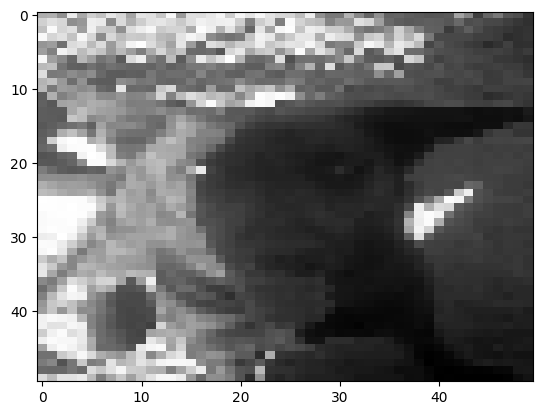

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0], cmap="gray", aspect='auto')
plt.show()

In [ ]:
training_data[1][1]

array([158., 162., 164., 162., 153., 128., 122., 130., 141., 138., 133.,
       138., 105., 107.,  91.,  70.,  55.,  47.,  43.,  58.,  51.,  47.,
        36.,  29.,  55.,  73.,  79.,  74.,  79.,  83.,  87.,  97., 106.,
        92., 107., 100.,  98., 107., 108., 128., 133., 138., 134., 152.,
       142., 148., 142., 139., 139., 139.], dtype=float32)

Training Convnet


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm


REBUILD_DATA = False # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()


training_data = np.load("training_data_images.npy", allow_pickle=True)
print(len(training_data))

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(1, 1, 50, 50)  # Use batch_size=1 for shape calculation
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)  # 2 classes

    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].numel()  # Compute the flattened size
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # Raw logits
        return x

net = Net()
print(net)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [142]:
import numpy as np
import torch

# Example conversion if targets are in numpy.float32 format
# Ensure targets are integers for classification tasks

# Example dummy data
inputs = np.random.rand(1000, 50, 50)  # Replace with your actual input data
targets = np.random.randint(0, 2, size=(1000,))  # Dummy targets (2 classes: 0 and 1)

# Convert numpy arrays to PyTorch tensors
X = torch.tensor(inputs, dtype=torch.float32)  # Ensure data type is float32
y = torch.tensor(targets, dtype=torch.long)    # Ensure targets are in long format for classification

# Normalize inputs if needed
X = X / 255.0

# Calculate validation size
VAL_PCT = 0.1
val_size = int(len(X) * VAL_PCT)
print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(f"Training data size: {len(train_X)}")
print(f"Testing data size: {len(test_X)}")


100
Training data size: 900
Testing data size: 100


In [ ]:
from tqdm import tqdm
import torch.optim as optim
import torch.nn as nn

# Initialize optimizer and loss function
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()  # For classification tasks

# Training parameters
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE]
        batch_y = train_y[i:i+BATCH_SIZE]

        # Ensure correct shape
        batch_size = batch_X.size(0)
        if batch_X.dim() == 3:  # Check if input is missing the channel dimension
            batch_X = batch_X.unsqueeze(1)  # Add channel dimension: [batch_size, 1, 50, 50]

        print(f"Batch X shape: {batch_X.shape}")

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()  # Update weights

        # Print output and target shapes for verification
        print(f"Output shape: {outputs.shape}")
        print(f"Target shape: {batch_y.shape}")
        print(f"Loss: {loss.item()}")

    print(f"Epoch: {epoch}. Loss: {loss.item()}")


 11%|█         | 1/9 [00:00<00:01,  7.41it/s]

Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6924752593040466
Batch X shape: torch.Size([100, 1, 50, 50])


 33%|███▎      | 3/9 [00:00<00:00,  7.54it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6882010698318481
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6923975944519043
Batch X shape: torch.Size([100, 1, 50, 50])


 56%|█████▌    | 5/9 [00:00<00:00,  7.80it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6965685486793518
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6939997673034668
Batch X shape: torch.Size([100, 1, 50, 50])


 78%|███████▊  | 7/9 [00:00<00:00,  7.28it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6963790655136108
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.696948766708374
Batch X shape: torch.Size([100, 1, 50, 50])


100%|██████████| 9/9 [00:01<00:00,  7.51it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6858667731285095
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.7004825472831726
Epoch: 0. Loss: 0.7004825472831726


In [ ]:
correct = 0
total = 0

# Ensure that the network is in evaluation mode
net.eval()

with torch.no_grad():
    # Process the test set in batches
    batch_size = 100
    for i in tqdm(range(0, len(test_X), batch_size)):
        # Slice the batch
        batch_X = test_X[i:i+batch_size]
        batch_y = test_y[i:i+batch_size]

        # Ensure the correct shape for input data
        if batch_X.dim() == 3:  # Check if input is missing the channel dimension
            batch_X = batch_X.unsqueeze(1)  # Add channel dimension: [batch_size, 1, 50, 50]

        # Forward pass through the network
        outputs = net(batch_X)
        
        # Get the predictions
        _, predicted_classes = torch.max(outputs, 1)
        
        # Compute the number of correct predictions
        correct += (predicted_classes == batch_y).sum().item()
        total += batch_y.size(0)

# Print accuracy
print("Accuracy: ", round(correct / total, 3))


100%|██████████| 1/1 [00:00<00:00, 17.08it/s]

Accuracy:  0.62


Moving to GPU 


In [165]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

REBUILD_DATA = False # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(1, 1, 50, 50)  # Use batch_size=1 for shape calculation
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)  # 2 classes

    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].numel()  # Compute the flattened size
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # Raw logits
        return x

net = Net()
print(net)



if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

training_data = np.load("training_data_images.npy", allow_pickle=True)
print(len(training_data))

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

inputs = np.random.rand(1000, 50, 50)  # Replace with your actual input data
targets = np.random.randint(0, 2, size=(1000,))  # Dummy targets (2 classes: 0 and 1)

# Convert numpy arrays to PyTorch tensors
X = torch.tensor(inputs, dtype=torch.float32)  # Ensure data type is float32
y = torch.tensor(targets, dtype=torch.long)    # Ensure targets are in long format for classification

# Normalize inputs if needed
X = X / 255.0

# Calculate validation size
VAL_PCT = 0.1
val_size = int(len(X) * VAL_PCT)
print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(f"Training data size: {len(train_X)}")
print(f"Testing data size: {len(test_X)}")


BATCH_SIZE = 100
EPOCHS = 1


def train(net):
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE]
            batch_y = train_y[i:i+BATCH_SIZE]

            # Ensure correct shape
            batch_size = batch_X.size(0)
            if batch_X.dim() == 3:  # Check if input is missing the channel dimension
                batch_X = batch_X.unsqueeze(1)  # Add channel dimension: [batch_size, 1, 50, 50]

            print(f"Batch X shape: {batch_X.shape}")

            net.zero_grad()

            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()  # Update weights

            # Print output and target shapes for verification
            print(f"Output shape: {outputs.shape}")
            print(f"Target shape: {batch_y.shape}")
            print(f"Loss: {loss.item()}")

    print(f"Epoch: {epoch}. Loss: {loss.item()}")


def test(net):
    correct = 0
    total = 0

    # Ensure that the network is in evaluation mode
    net.eval()

    with torch.no_grad():
        # Process the test set in batches
        batch_size = 100
        for i in tqdm(range(0, len(test_X), batch_size)):
            # Slice the batch
            batch_X = test_X[i:i+batch_size]
            batch_y = test_y[i:i+batch_size]

            # Ensure the correct shape for input data
            if batch_X.dim() == 3:  # Check if input is missing the channel dimension
                batch_X = batch_X.unsqueeze(1)  # Add channel dimension: [batch_size, 1, 50, 50]

            # Forward pass through the network
            outputs = net(batch_X)
        
            # Get the predictions
            _, predicted_classes = torch.max(outputs, 1)
        
            # Compute the number of correct predictions
            correct += (predicted_classes == batch_y).sum().item()
            total += batch_y.size(0)

    # Print accuracy
    print("Accuracy: ", round(correct / total, 3))

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)
24946
100
Training data size: 900
Testing data size: 100


In [166]:
train(net)

  0%|          | 0/9 [00:00<?, ?it/s]

Batch X shape: torch.Size([100, 1, 50, 50])


 22%|██▏       | 2/9 [00:00<00:01,  4.45it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6927664875984192
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6972547173500061
Batch X shape: torch.Size([100, 1, 50, 50])


 44%|████▍     | 4/9 [00:00<00:00,  5.32it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6892587542533875
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6915618181228638
Batch X shape: torch.Size([100, 1, 50, 50])


 67%|██████▋   | 6/9 [00:01<00:00,  5.71it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6952067613601685
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.695953905582428
Batch X shape: torch.Size([100, 1, 50, 50])


 89%|████████▉ | 8/9 [00:01<00:00,  6.31it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6871296167373657
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6899547576904297
Batch X shape: torch.Size([100, 1, 50, 50])


100%|██████████| 9/9 [00:01<00:00,  5.68it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.7021464705467224
Epoch: 0. Loss: 0.7021464705467224


In [168]:
test(net)

100%|██████████| 1/1 [00:00<00:00, 14.92it/s]

Accuracy:  0.53


In [167]:
 torch.cuda.is_available()

False

In [156]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [158]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the CPU


In [159]:
torch.cuda.device_count()

0

In [160]:
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [162]:
net = Net().to(device)

In [169]:
def train(net):
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE].to(device)
            batch_y = train_y[i:i+BATCH_SIZE].to(device)

            # Ensure correct shape
            batch_size = batch_X.size(0)
            if batch_X.dim() == 3:  # Check if input is missing the channel dimension
                batch_X = batch_X.unsqueeze(1)  # Add channel dimension: [batch_size, 1, 50, 50]

            print(f"Batch X shape: {batch_X.shape}")

            net.zero_grad()

            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()  # Update weights

            # Print output and target shapes for verification
            print(f"Output shape: {outputs.shape}")
            print(f"Target shape: {batch_y.shape}")
            print(f"Loss: {loss.item()}")

    print(f"Epoch: {epoch}. Loss: {loss.item()}")
train(net)

 11%|█         | 1/9 [00:00<00:01,  5.99it/s]

Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6891078948974609
Batch X shape: torch.Size([100, 1, 50, 50])


 22%|██▏       | 2/9 [00:00<00:02,  3.06it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.695498526096344
Batch X shape: torch.Size([100, 1, 50, 50])


 33%|███▎      | 3/9 [00:04<00:12,  2.15s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6886647939682007
Batch X shape: torch.Size([100, 1, 50, 50])


 44%|████▍     | 4/9 [00:12<00:21,  4.23s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6916133165359497
Batch X shape: torch.Size([100, 1, 50, 50])


 56%|█████▌    | 5/9 [00:15<00:15,  3.92s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6945967078208923
Batch X shape: torch.Size([100, 1, 50, 50])


 67%|██████▋   | 6/9 [00:20<00:12,  4.10s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.695295512676239
Batch X shape: torch.Size([100, 1, 50, 50])


 78%|███████▊  | 7/9 [00:22<00:07,  3.55s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6874765753746033
Batch X shape: torch.Size([100, 1, 50, 50])


 89%|████████▉ | 8/9 [00:25<00:03,  3.48s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.690207839012146
Batch X shape: torch.Size([100, 1, 50, 50])


100%|██████████| 9/9 [00:28<00:00,  3.15s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.7006392478942871
Epoch: 0. Loss: 0.7006392478942871


In [174]:
train(net)

  0%|          | 0/9 [00:00<?, ?it/s]

Batch X shape: torch.Size([100, 1, 50, 50])


 22%|██▏       | 2/9 [00:00<00:01,  5.17it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.689379870891571
Batch X shape: torch.Size([100, 1, 50, 50])
Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6952686905860901
Batch X shape: torch.Size([100, 1, 50, 50])


 33%|███▎      | 3/9 [00:00<00:01,  3.65it/s]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6889073848724365
Batch X shape: torch.Size([100, 1, 50, 50])


 44%|████▍     | 4/9 [00:05<00:09,  1.91s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6916666626930237
Batch X shape: torch.Size([100, 1, 50, 50])


 56%|█████▌    | 5/9 [00:08<00:09,  2.43s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6944779753684998
Batch X shape: torch.Size([100, 1, 50, 50])


 67%|██████▋   | 6/9 [00:12<00:09,  3.05s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6951534748077393
Batch X shape: torch.Size([100, 1, 50, 50])


 78%|███████▊  | 7/9 [00:18<00:08,  4.07s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6877223253250122
Batch X shape: torch.Size([100, 1, 50, 50])


 89%|████████▉ | 8/9 [00:22<00:03,  3.92s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.6903088092803955
Batch X shape: torch.Size([100, 1, 50, 50])


100%|██████████| 9/9 [00:26<00:00,  2.93s/it]

Output shape: torch.Size([100, 2])
Target shape: torch.Size([100])
Loss: 0.7003127336502075
Epoch: 0. Loss: 0.7003127336502075


In [173]:
def test(net):
    correct = 0
    total = 0

    # Ensure that the network is in evaluation mode
    net.eval()

    with torch.no_grad():
        # Process the test set in batches
        batch_size = 100
        for i in tqdm(range(0, len(test_X), batch_size)):
            # Slice the batch
            batch_X = test_X[i:i+batch_size].to(device)
            batch_y = test_y[i:i+batch_size].to(device)

            # Ensure the correct shape for input data
            if batch_X.dim() == 3:  # Check if input is missing the channel dimension
                batch_X = batch_X.unsqueeze(1)  # Add channel dimension: [batch_size, 1, 50, 50]

            # Forward pass through the network
            outputs = net(batch_X)
        
            # Get the predictions
            _, predicted_classes = torch.max(outputs, 1)
        
            # Compute the number of correct predictions
            correct += (predicted_classes == batch_y).sum().item()
            total += batch_y.size(0)

    # Print accuracy
    print("Accuracy: ", round(correct / total, 3))

test(net)

100%|██████████| 1/1 [00:00<00:00, 17.54it/s]

Accuracy:  0.53


Basic Model Analysis


In [182]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


REBUILD_DATA = False # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)

    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)



if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")




net = Net().to(device)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

training_data = np.load("training_data_images.npy", allow_pickle=True)
print(len(training_data))

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

inputs = np.random.rand(1000, 50, 50)  # Replace with your actual input data
targets = np.random.randint(0, 2, size=(1000,))  # Dummy targets (2 classes: 0 and 1)

# Convert numpy arrays to PyTorch tensors
X = torch.tensor(inputs, dtype=torch.float32)  # Ensure data type is float32
y = torch.tensor(targets, dtype=torch.long)    # Ensure targets are in long format for classification

# Normalize inputs if needed
X = X / 255.0

# Calculate validation size
VAL_PCT = 0.1
val_size = int(len(X) * VAL_PCT)
print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(f"Training data size: {len(train_X)}")
print(f"Testing data size: {len(test_X)}")


def train(net):
    BATCH_SIZE = 100
    EPOCHS = 3
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
            batch_y = train_y[i:i+BATCH_SIZE]

            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            net.zero_grad()
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()
        print(loss)

def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_X[i].view(-1, 1, 50, 50).to(device))[0]

            predicted_class = torch.argmax(net_out)
            if predicted_class == real_class:
                correct += 1
            total += 1
    print("Accuracy:", round(correct/total,3))

train(net)
test(net)


Running on the CPU
24946
100
Training data size: 900
Testing data size: 100


100%|██████████| 9/9 [00:01<00:00,  5.81it/s]


tensor(0.6940, grad_fn=<NllLossBackward0>)


100%|██████████| 9/9 [00:01<00:00,  7.06it/s]


tensor(0.6942, grad_fn=<NllLossBackward0>)


100%|██████████| 9/9 [00:01<00:00,  6.93it/s]


tensor(0.6942, grad_fn=<NllLossBackward0>)


100%|██████████| 100/100 [00:00<00:00, 651.33it/s]

Accuracy: 1.0


In [187]:
def fwd_pass(X, y, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs, y)

    if train:
        loss.backward()
        optimizer.step()

    return acc, loss


In [221]:
def test(size=32):
    random_start = np.random.randint(len(test_X) - size)
    X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1, 1, 50, 50).to(device), y.to(device))
    return val_acc, val_loss

val_acc, val_loss = test(size=32)
print(val_acc, val_loss)

1.0 tensor(0.6934)


In [231]:
import time

MODEL_NAME = f"model-{int(time.time())}"  # gives a dynamic model name, to just help with things getting messy over time.
net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def train():
    BATCH_SIZE = 100
    EPOCHS = 7

    with open("model.log", "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50).to(device)
                batch_y = train_y[i:i+BATCH_SIZE].to(device)

                batch_X, batch_y = batch_X.to(device), batch_y.to(device)

                acc, loss = fwd_pass(batch_X, batch_y, train=True)

                if i % 50 == 0:
                    val_acc, val_loss = test(size=100)
                    f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc),2)},{round(float(loss),4)},{round(float(val_acc),2)},{round(float(val_loss),4)},{epoch}\n")
                    
                                        

train()

model-1721680438


  0%|          | 0/9 [00:00<?, ?it/s]


RuntimeError: The size of tensor a (2) must match the size of tensor b (100) at non-singleton dimension 1

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

model_name = MODEL_NAME

def create_acc_loss_graph(model_name):
    contents = open("model.log", "r").read().split("\n")

    times = []
    accuracies = []
    losses = []

    val_accs = []
    val_losses = []

    for c in contents:
        if model_name in c:
            name, timestamp, acc, loss, val_acc, val_loss, epoch = c.split(",")

            times.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))

            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))

    fig = plt.figure()

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

    ax1.plot(times, accuracies, label="acc")
    ax1.plot(times, val_accs, label="val_acc")
    ax1.legend(loc=2)

    ax2.plot(times, losses, label="loss")
    ax2.plot(times, val_losses, label="val_loss")
    ax2.legend(loc=2)

    plt.show()